<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [ ]:
!pip install pandas 
!pip install matplotlib


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


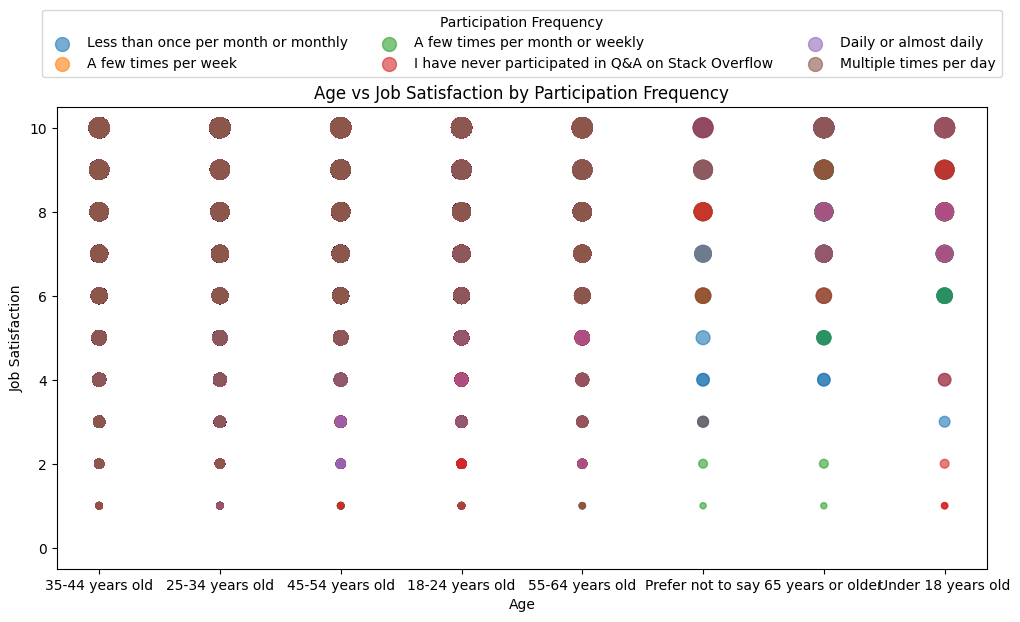

In [9]:
##Write your code here
df_asj = df[['Age', 'SOPartFreq', 'JobSat']].dropna()

plt.figure(figsize=(12, 6))

for freq in df_asj['SOPartFreq'].unique():
    subset = df_asj[df_asj['SOPartFreq'] == freq]

    plt.scatter(
        subset['Age'],
        subset['JobSat'],      
        s=subset['JobSat'] * 20,
        alpha=0.6,
        label=freq
    )

plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.title('Age vs Job Satisfaction by Participation Frequency')

plt.legend(
    title='Participation Frequency',
    loc='lower center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=3
)

plt.show()

    

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


In [16]:
q95=df['ConvertedCompYearly'].quantile(0.95)
df=df[df['ConvertedCompYearly']<=q95]
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df['Age_num'] = df['Age'].map(age_map)


C:\Users\chebo\AppData\Local\Temp\ipykernel_12040\496464381.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_num'] = df['Age'].map(age_map)


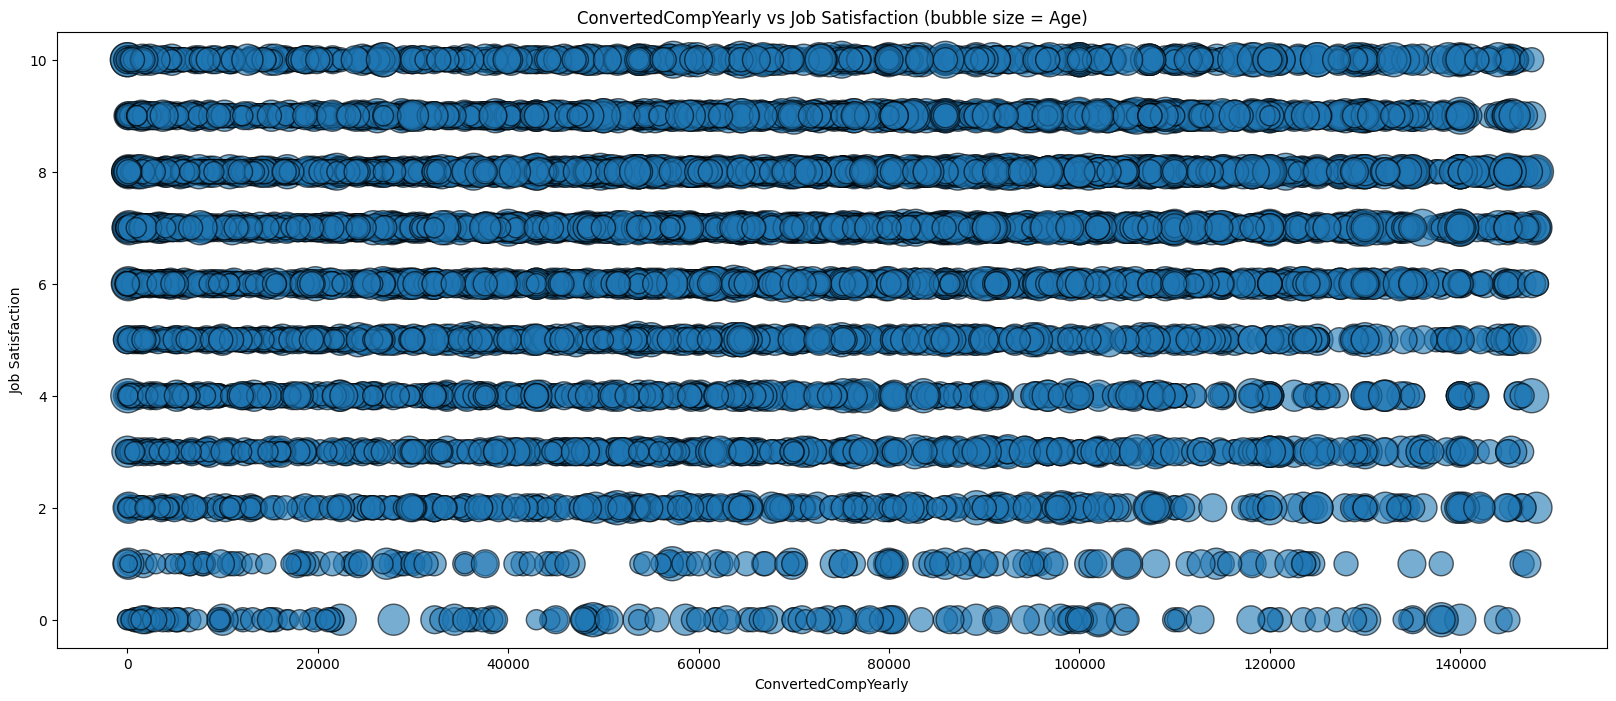

In [26]:
##Write your code here
df_cj=df[['ConvertedCompYearly','JobSat', 'Age_num']].dropna()
df_cj
plt.figure(figsize=(20, 8))
plt.scatter(
    df_cj['ConvertedCompYearly'],
    df_cj['JobSat'],
    s=df_cj['Age_num']*10,
    alpha=0.6,
    edgecolors='black'
)
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Job Satisfaction')
plt.title('ConvertedCompYearly vs Job Satisfaction (bubble size = Age)')
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [29]:
##Write your code here
df.loc[:,'LanguageHaveWorkedWith']=df['LanguageHaveWorkedWith'].str.split(':')
df=df.explode('LanguageHaveWorkedWith')

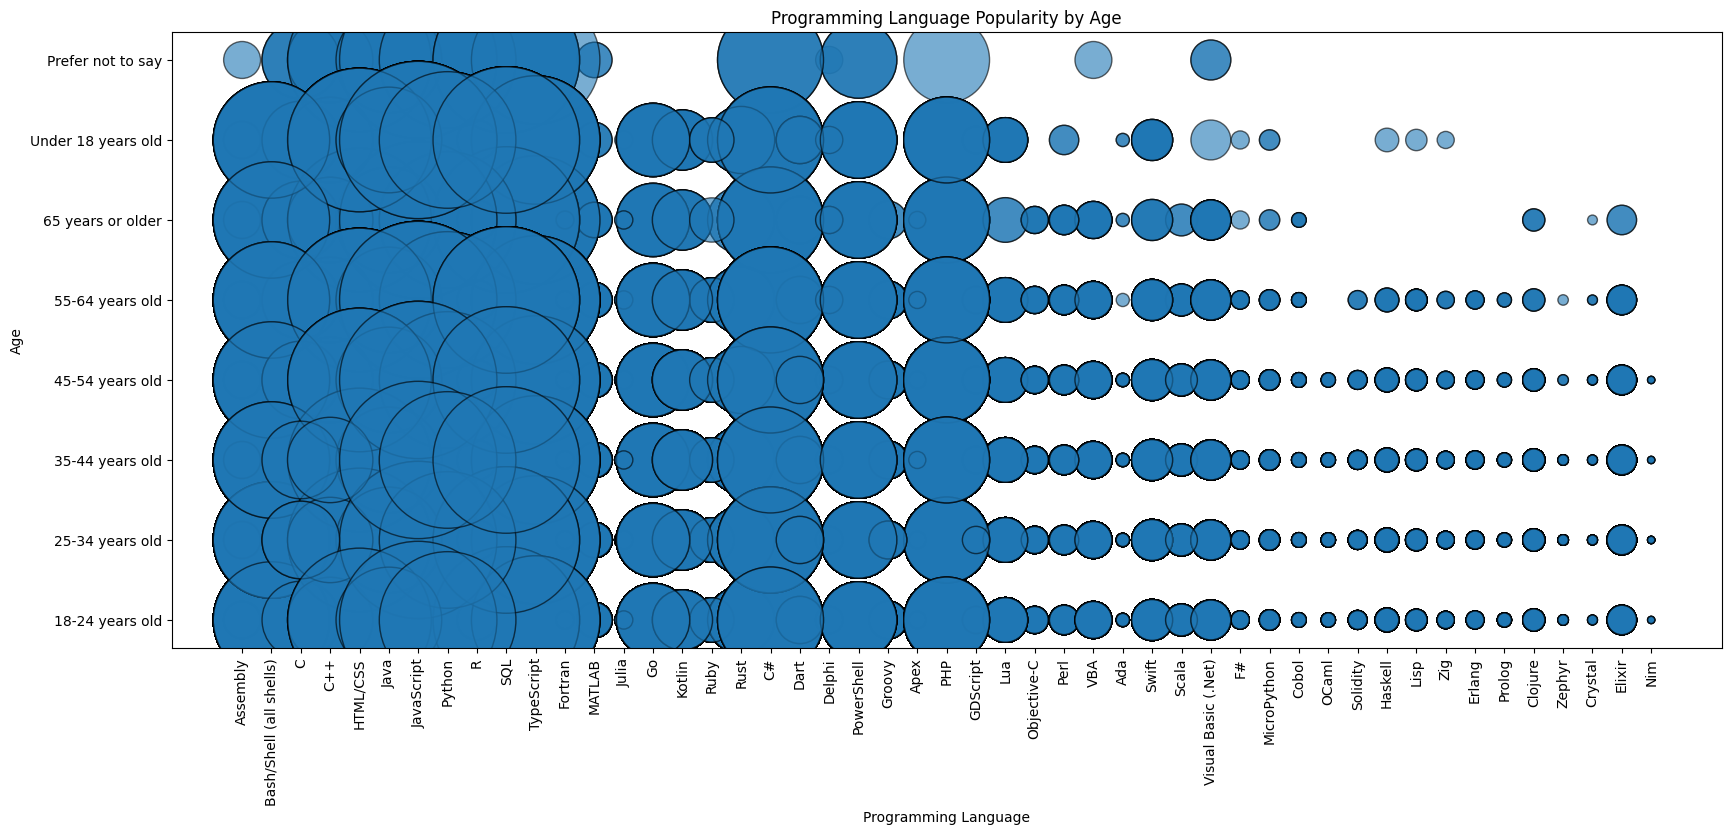

In [34]:
##Write your code here
df_la=df[['LanguageHaveWorkedWith','Age']].dropna()
df_la['LanguageHaveWorkedWith']=df_la['LanguageHaveWorkedWith'].str.split(';')
df_la=df_la.explode('LanguageHaveWorkedWith')
lang_freq = df_la['LanguageHaveWorkedWith'].value_counts()
df_la['freq'] = df_la['LanguageHaveWorkedWith'].map(lang_freq)

plt.figure(figsize=(20, 8))
plt.scatter(
    df_la['LanguageHaveWorkedWith'],
    df_la['Age'],
    s=df_la['freq'],
    alpha=0.6,
    edgecolors='black')

plt.xlabel('Programming Language')
plt.ylabel('Age')
plt.title('Programming Language Popularity by Age')
plt.xticks(rotation=90)
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


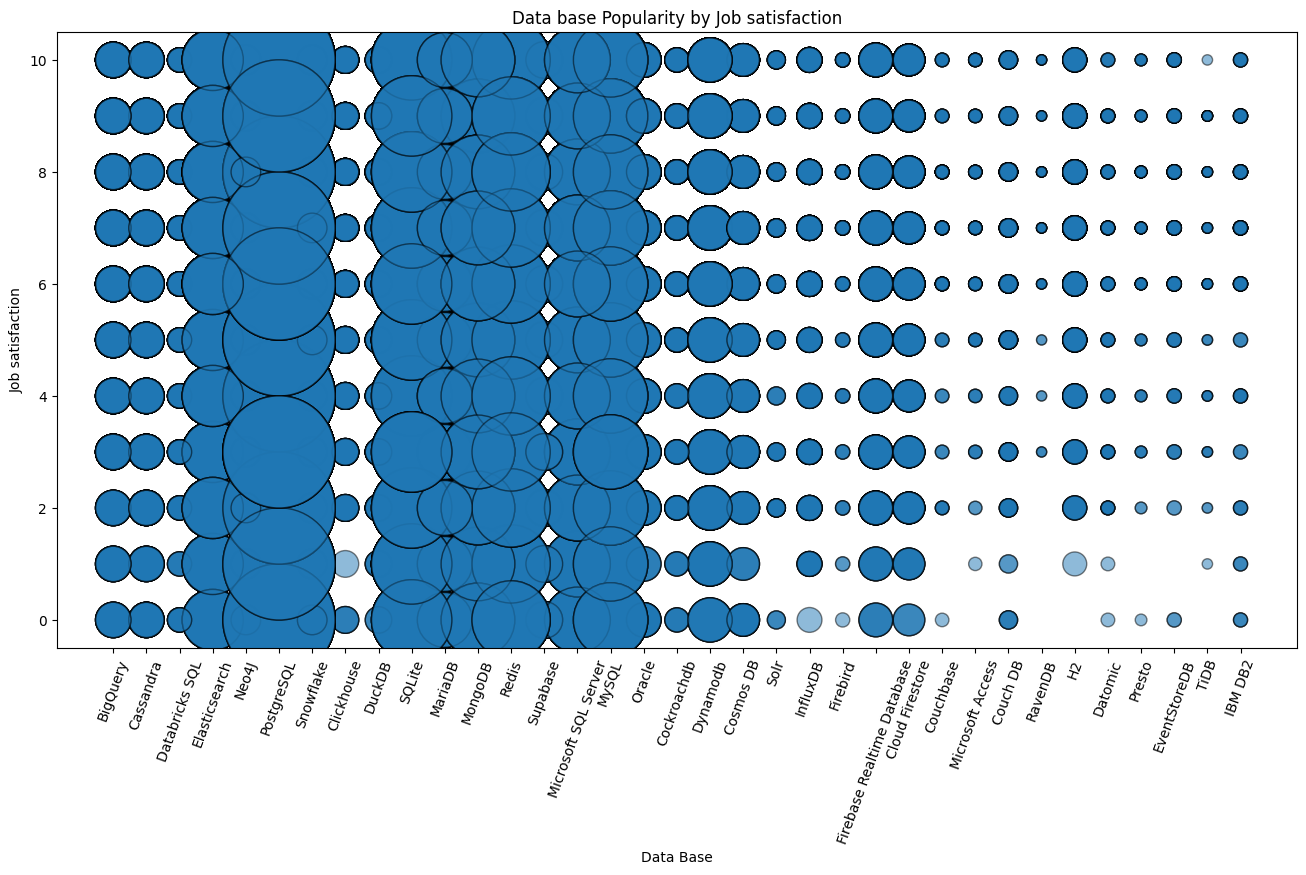

In [62]:
##Write your code here
db=df[['DatabaseWantToWorkWith', 'JobSat']].dropna()
db['DatabaseWantToWorkWith']=db['DatabaseWantToWorkWith'].str.split(';')
db=db.explode('DatabaseWantToWorkWith')
freq=db['DatabaseWantToWorkWith'].value_counts()
db['freq']=db['DatabaseWantToWorkWith'].map(freq)

plt.figure(figsize=(16, 8))
plt.scatter(
    db['DatabaseWantToWorkWith'],
    db['JobSat'],
    s=db['freq'],
    alpha=0.5,
    edgecolor='black'
)
plt.xlabel('Data Base')
plt.ylabel('Job satisfaction')
plt.title('Data base Popularity by Job satisfaction')
plt.xticks(rotation=70)
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [48]:
df[['ConvertedCompYearly','DevType', 'JobSat']]

ConvertedCompYearly                                        DevType  \
72                  7322.0  Data scientist or machine learning specialist   
374                30074.0                            Academic researcher   
379                91295.0  Data scientist or machine learning specialist   
385                53703.0                            Developer, back-end   
389               110000.0                                        Student   
...                    ...                                            ...   
41178               9711.0                          Developer, full-stack   
41179              15600.0                            Developer, back-end   
41180              44640.0    Developer, embedded applications or devices   
41185             116844.0                          Developer, full-stack   
41186              12000.0                          Developer, full-stack   

       JobSat  
72       10.0  
374       NaN  
379      10.0  
385       NaN  
389      10.0  
...       ...  
41178     0.0  
41179     NaN  
41180     NaN  
41185     NaN  
41186     3.0  

[20194 rows x 3 columns]

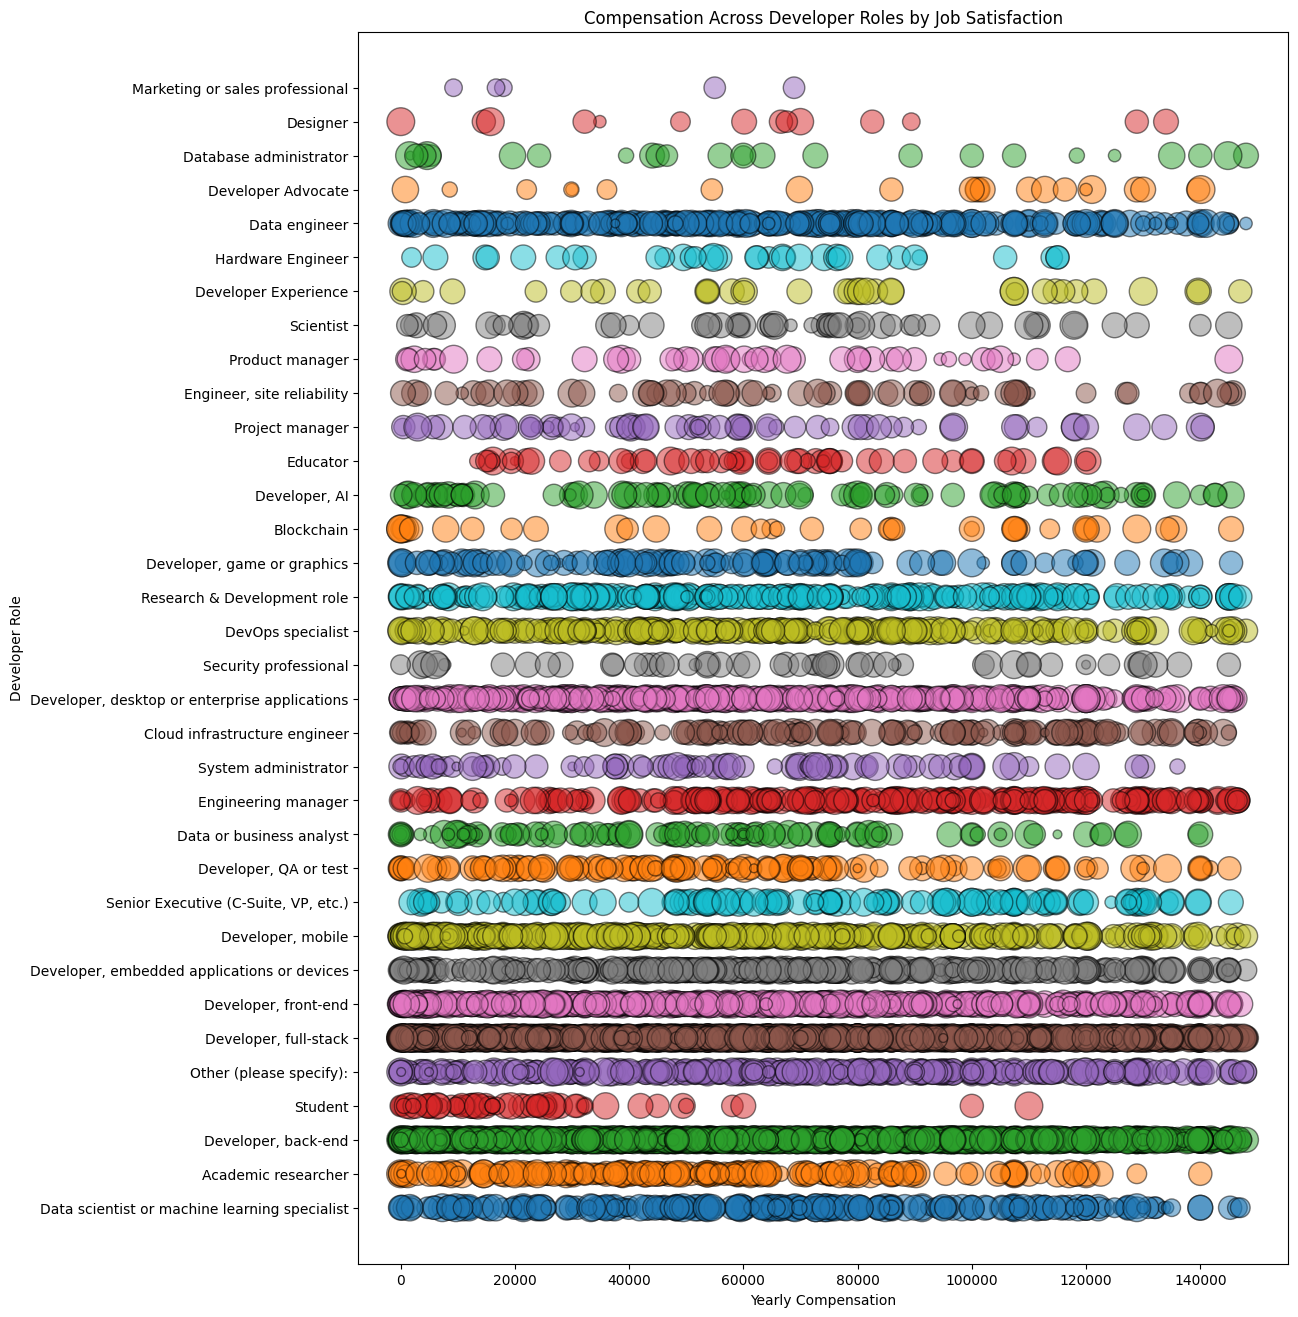

In [61]:
##Write your code here
dc=df[['ConvertedCompYearly','DevType', 'JobSat']]
plt.figure(figsize=(12, 16))
for dev in dc['DevType'].unique():
    role=dc[dc['DevType']==dev]
    plt.scatter(
    role['ConvertedCompYearly'],
    role['DevType'],
    s=role['JobSat']*40,
    edgecolor='black',
    alpha=0.5
)
plt.xlabel('Yearly Compensation')
plt.ylabel('Developer Role')
plt.title('Compensation Across Developer Roles by Job Satisfaction')
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


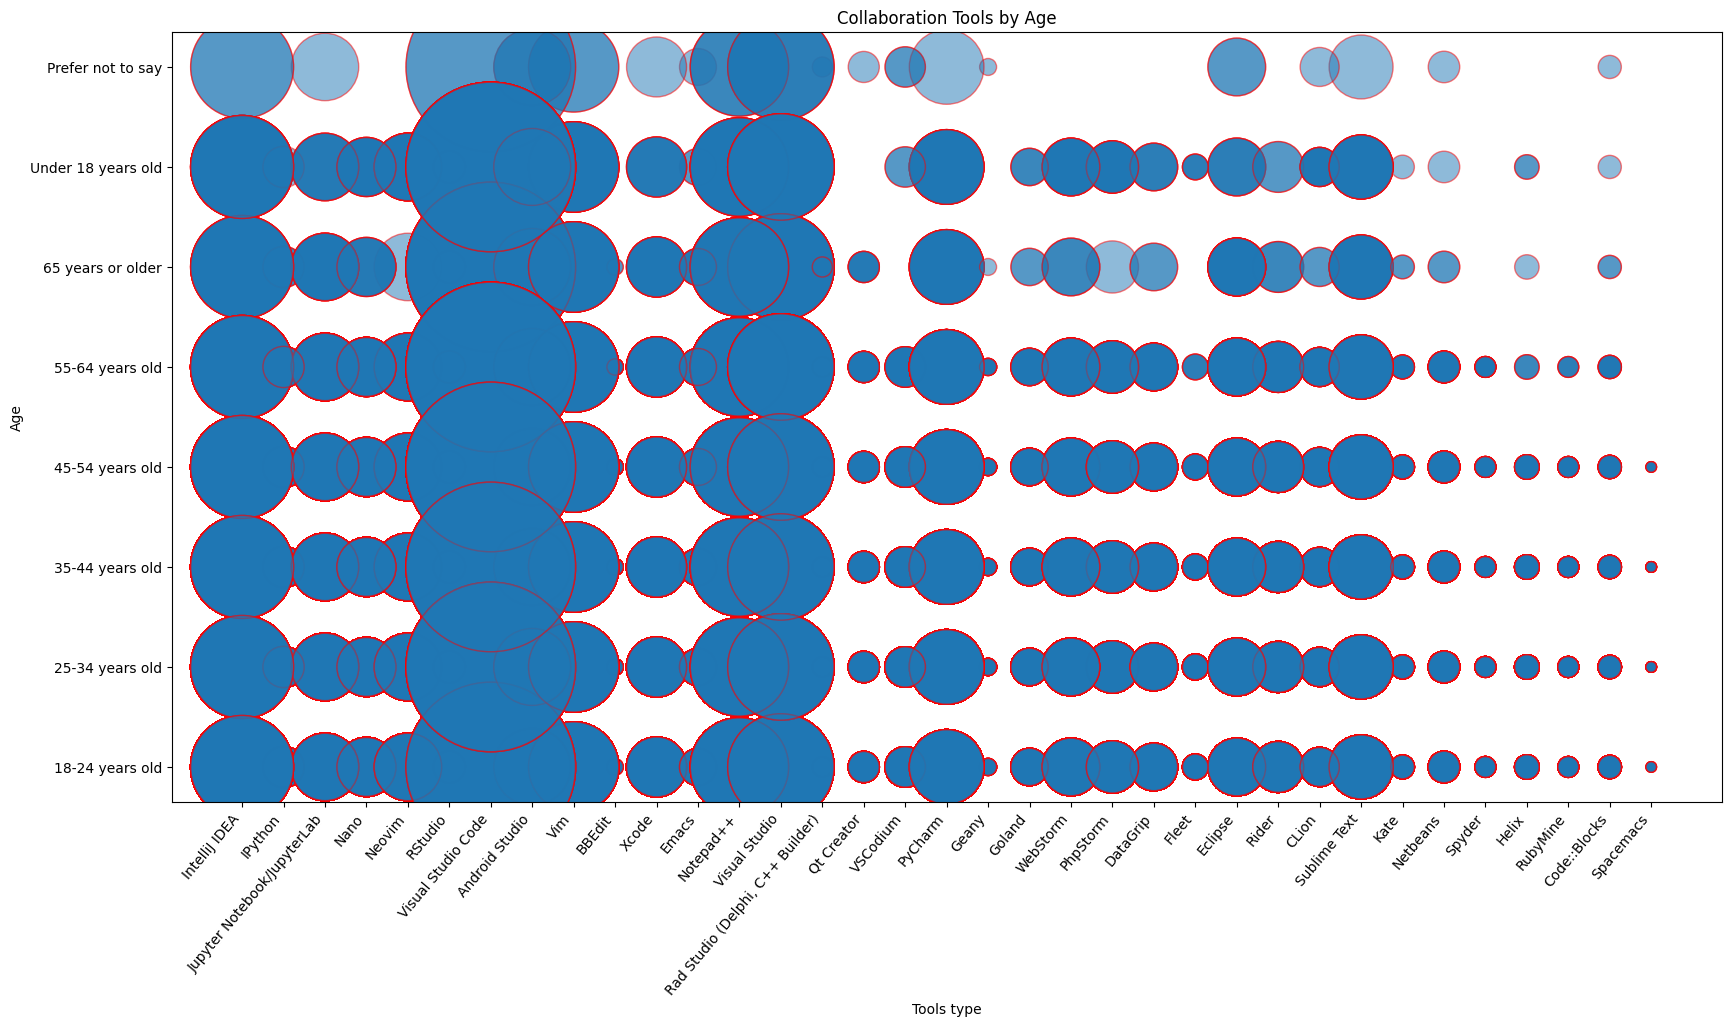

In [77]:
##Write your code here
qw=df[['NEWCollabToolsHaveWorkedWith','Age']].dropna()
qw.loc[:,'NEWCollabToolsHaveWorkedWith']=qw['NEWCollabToolsHaveWorkedWith'].str.split(';')
qw=qw.explode('NEWCollabToolsHaveWorkedWith')
count=qw['NEWCollabToolsHaveWorkedWith'].value_counts()
qw['freq']=qw['NEWCollabToolsHaveWorkedWith'].map(count)
plt.figure(figsize=(20, 10))
plt.scatter(
    qw['NEWCollabToolsHaveWorkedWith'],
    qw['Age'],
    s=qw['freq'],
    alpha=0.5,
    edgecolor='red'
)
plt.xlabel('Tools type')
plt.ylabel('Age')
plt.title('Collaboration Tools by Age')
plt.xticks(rotation=50, ha='right')
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



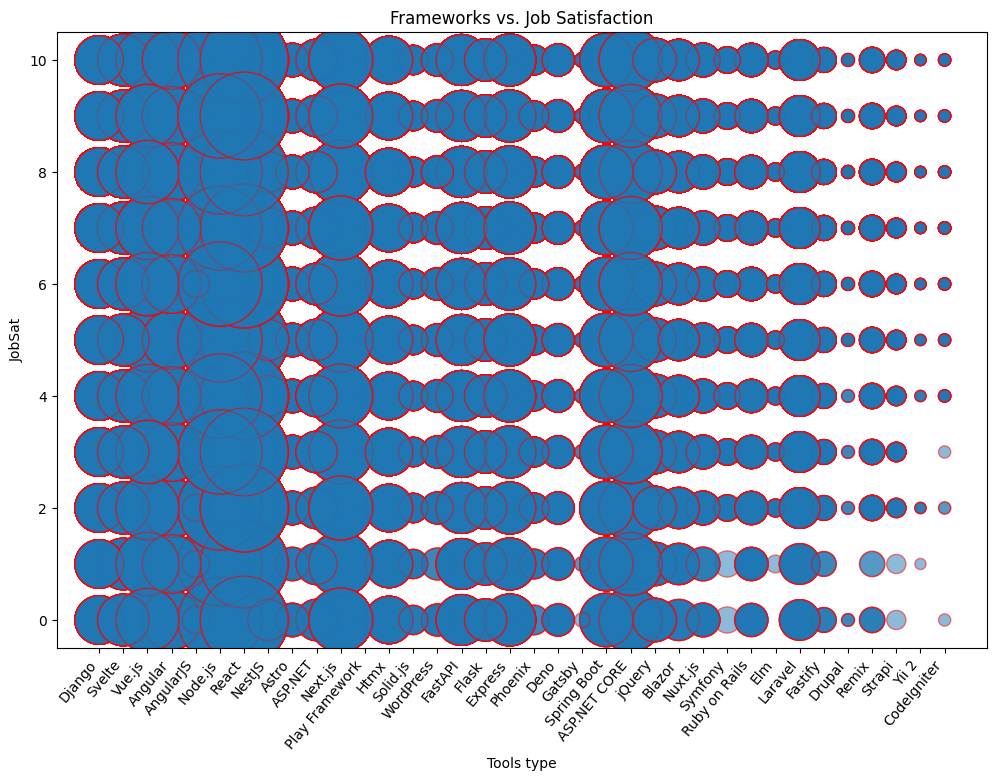

In [76]:
##Write your code here
we=df[['WebframeWantToWorkWith','JobSat']].dropna()
we.loc[:,'WebframeWantToWorkWith']=we['WebframeWantToWorkWith'].str.split(';')
we=we.explode('WebframeWantToWorkWith')
counts=we['WebframeWantToWorkWith'].value_counts()
we['freq']=we['WebframeWantToWorkWith'].map(counts)
plt.figure(figsize=(12, 8))
plt.scatter(
    we['WebframeWantToWorkWith'],
    we['JobSat'],
    s=we['freq'],
    alpha=0.5,
    edgecolor='red'
)
plt.xlabel('Tools type')
plt.ylabel('JobSat')
plt.title('Frameworks vs. Job Satisfaction')
plt.xticks(rotation=50, ha='right')
plt.show()
    
    

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [78]:
la=df[['LanguageAdmired', 'Country']]
la

LanguageAdmired                   Country
72                                  NaN                  Pakistan
374             C;C++;MATLAB;Python;SQL                   Austria
379    JavaScript;Python;SQL;TypeScript                    Turkey
385                              Python                    France
389                                 NaN  United States of America
...                                 ...                       ...
41178           C++;HTML/CSS;TypeScript                  Honduras
41179                 Go;JavaScript;SQL                   Ukraine
41180                            Python                    Sweden
41185                     C#;PowerShell  United States of America
41186   HTML/CSS;Java;JavaScript;Python  United States of America

[20194 rows x 2 columns]

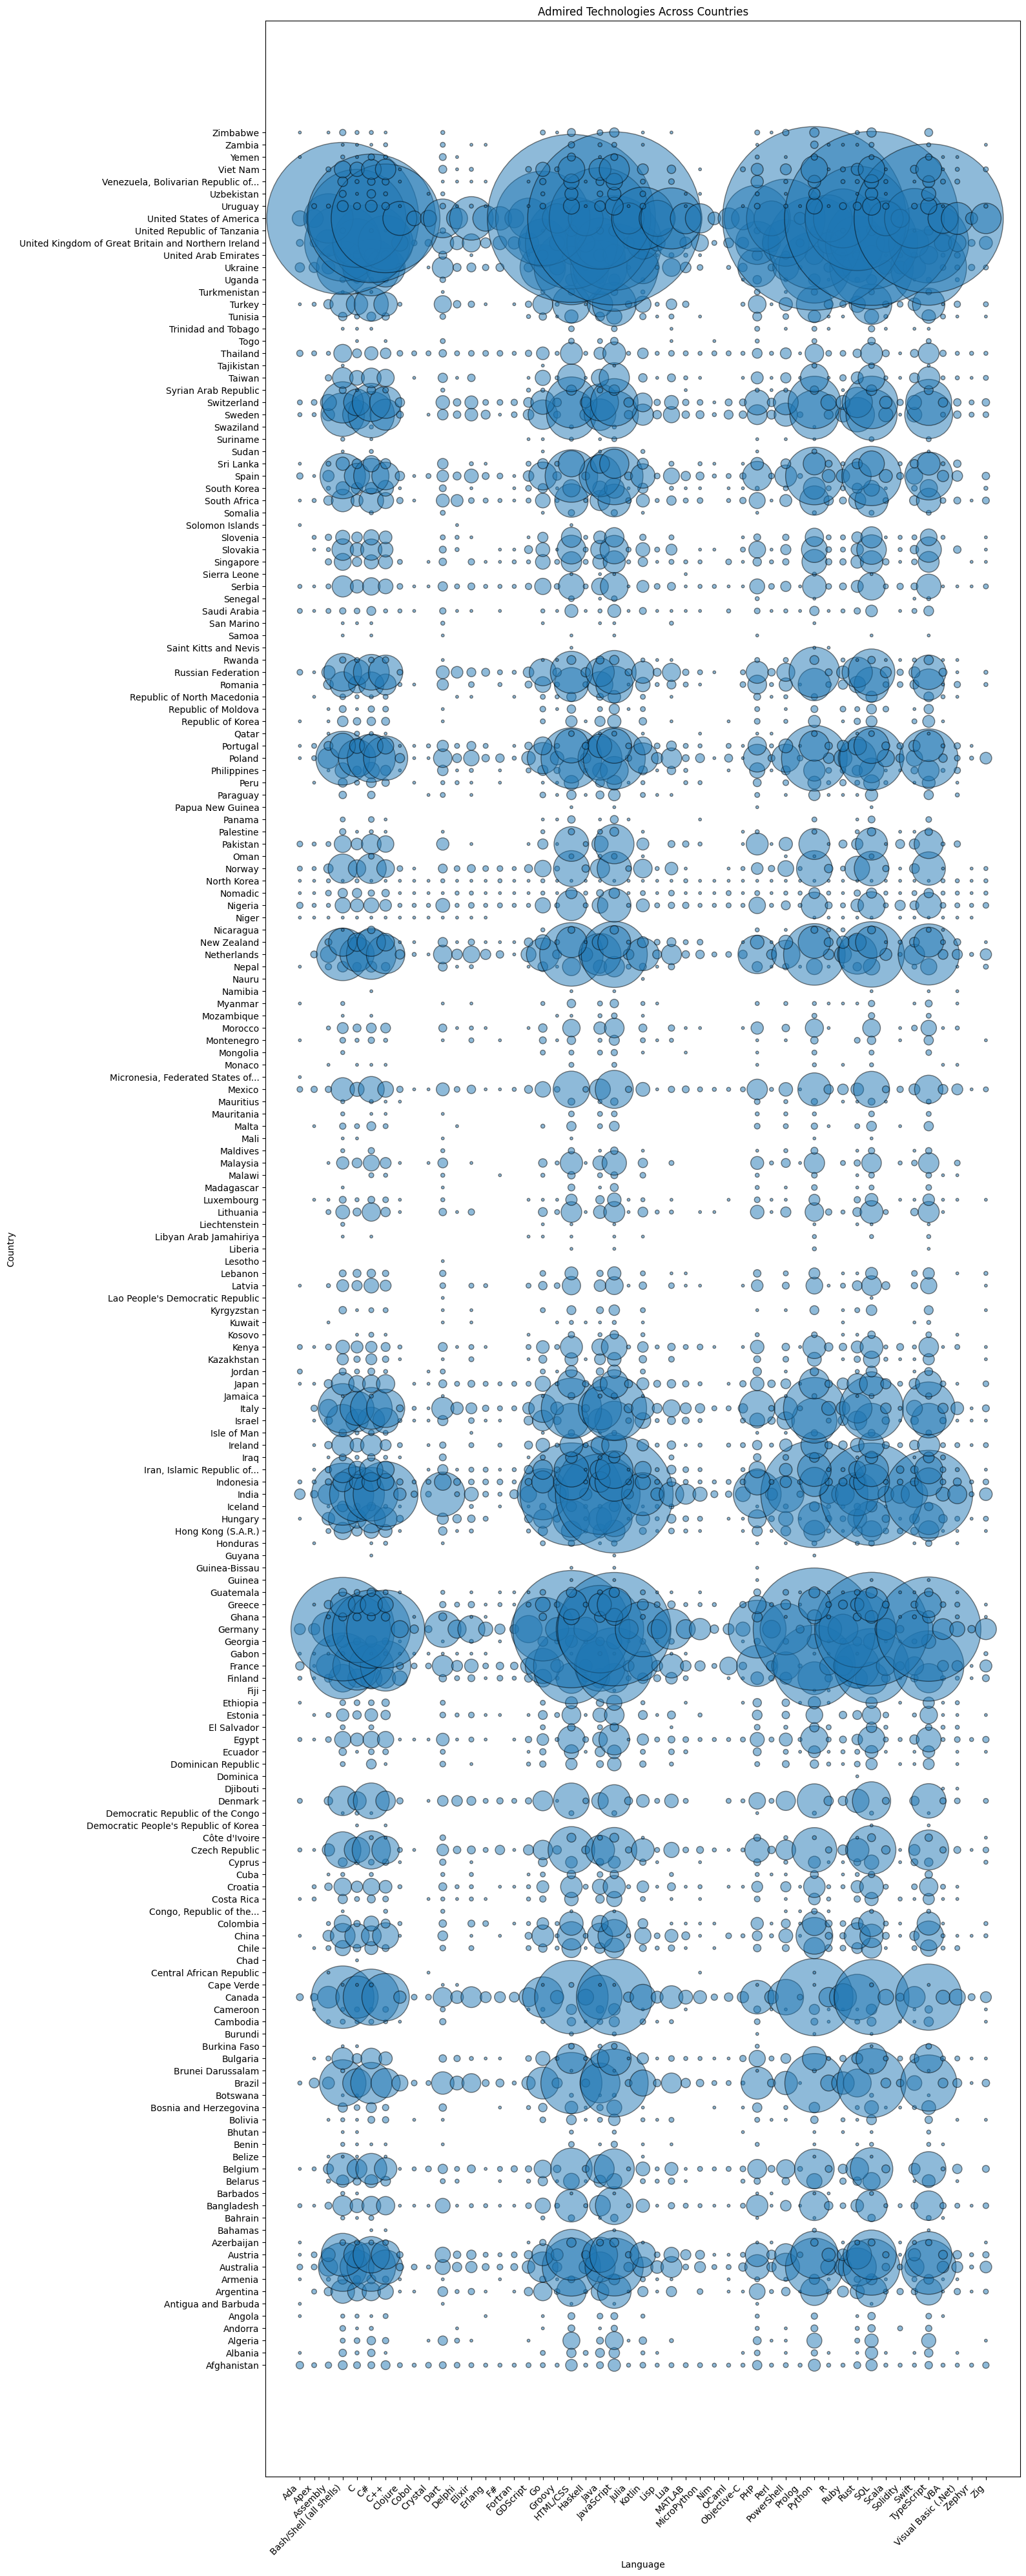

In [9]:
la = df[['LanguageAdmired', 'Country']].dropna()

la['LanguageAdmired'] = la['LanguageAdmired'].str.split(';')
la = la.explode('LanguageAdmired')
agg = (
    la
    .groupby(['Country', 'LanguageAdmired'])
    .size()
    .reset_index(name='freq')
)
agg['Country_code'] = agg['Country'].astype('category').cat.codes
agg['Lang_code'] = agg['LanguageAdmired'].astype('category').cat.codes
plt.figure(figsize=(16, 40))

plt.scatter(
    agg['Lang_code'],
    agg['Country_code'],
    s=agg['freq'] * 10,
    alpha=0.5,
    edgecolors='black'
)

plt.xticks(
    ticks=agg['Lang_code'].unique(),
    labels=agg['LanguageAdmired'].astype('category').cat.categories,
    rotation=45,
    ha='right'
)

plt.yticks(
    ticks=agg['Country_code'].unique(),
    labels=agg['Country'].astype('category').cat.categories
)

plt.xlabel('Language')
plt.ylabel('Country')
plt.title('Admired Technologies Across Countries')
plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
